# MUSHROOM VERİ SETİ

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import graphviz
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import statsmodels.api as sm

import scikitplot as skplt
from sklearn.model_selection import train_test_split

from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

In [3]:
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 

In [4]:
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 

In [5]:
# Hedef sütununu ekle
df = pd.concat([X, y], axis=1)

# Yeni DataFrame'i yazdır
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [6]:
df.columns = ["Şapka şekli","Şapka yüzeyi","Şapka rengi","Morluklar","Koku","Lamel eki","Lamel aralığı","Lamel boyutu","Lamel rengi","Sap şekli","Sap kök","Yüzüğün üstündeki sap yüzeyi","Yüzüğün altındaki sap yüzeyi","Yüzüğün üstündeki sap rengi","Yüzüğün altındaki sap rengi","Peçe tipi","Peçe rengi","Yüzüğün sayısı","Yüzük türü","Spor baskı rengi","Popülasyon","Doğal ortamı","Zehirli"]

In [7]:
# Describing all the Categorical Features
df.describe(include=['O'])

,Şapka şekli,Şapka yüzeyi,Şapka rengi,Morluklar,Koku,Lamel eki,Lamel aralığı,Lamel boyutu,Lamel rengi,Sap şekli,...,Yüzüğün üstündeki sap rengi,Yüzüğün altındaki sap rengi,Peçe tipi,Peçe rengi,Yüzüğün sayısı,Yüzük türü,Spor baskı rengi,Popülasyon,Doğal ortamı,Zehirli
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


`df.describe(include=['O'])` kodu, **Pandas** kitaplığının `describe()` fonksiyonunu kullanarak bir veri setindeki kategorik özelliklerin (nesneler) özet istatistiklerini verir.

**'O'** parametresi, yalnızca kategorik özelliklerin özet istatistiklerini hesaplamasını söyler.

Özet istatistikleri şunları içerebilir:

* **count:** Değerlerin sayısı
* **unique:** Benzersiz değerlerin sayısı
* **top:** Değerlerin toplamı
* **freq:** En sık görülen değerin frekansı

Bu kod, kategorik özelliklerin dağılımını ve veri setindeki benzersiz değerlerin sayısını anlamanıza yardımcı olabilir.

In [8]:
df.shape

(8124, 23)

## EKSİK VERİ TEMİZLEME

<Axes: >

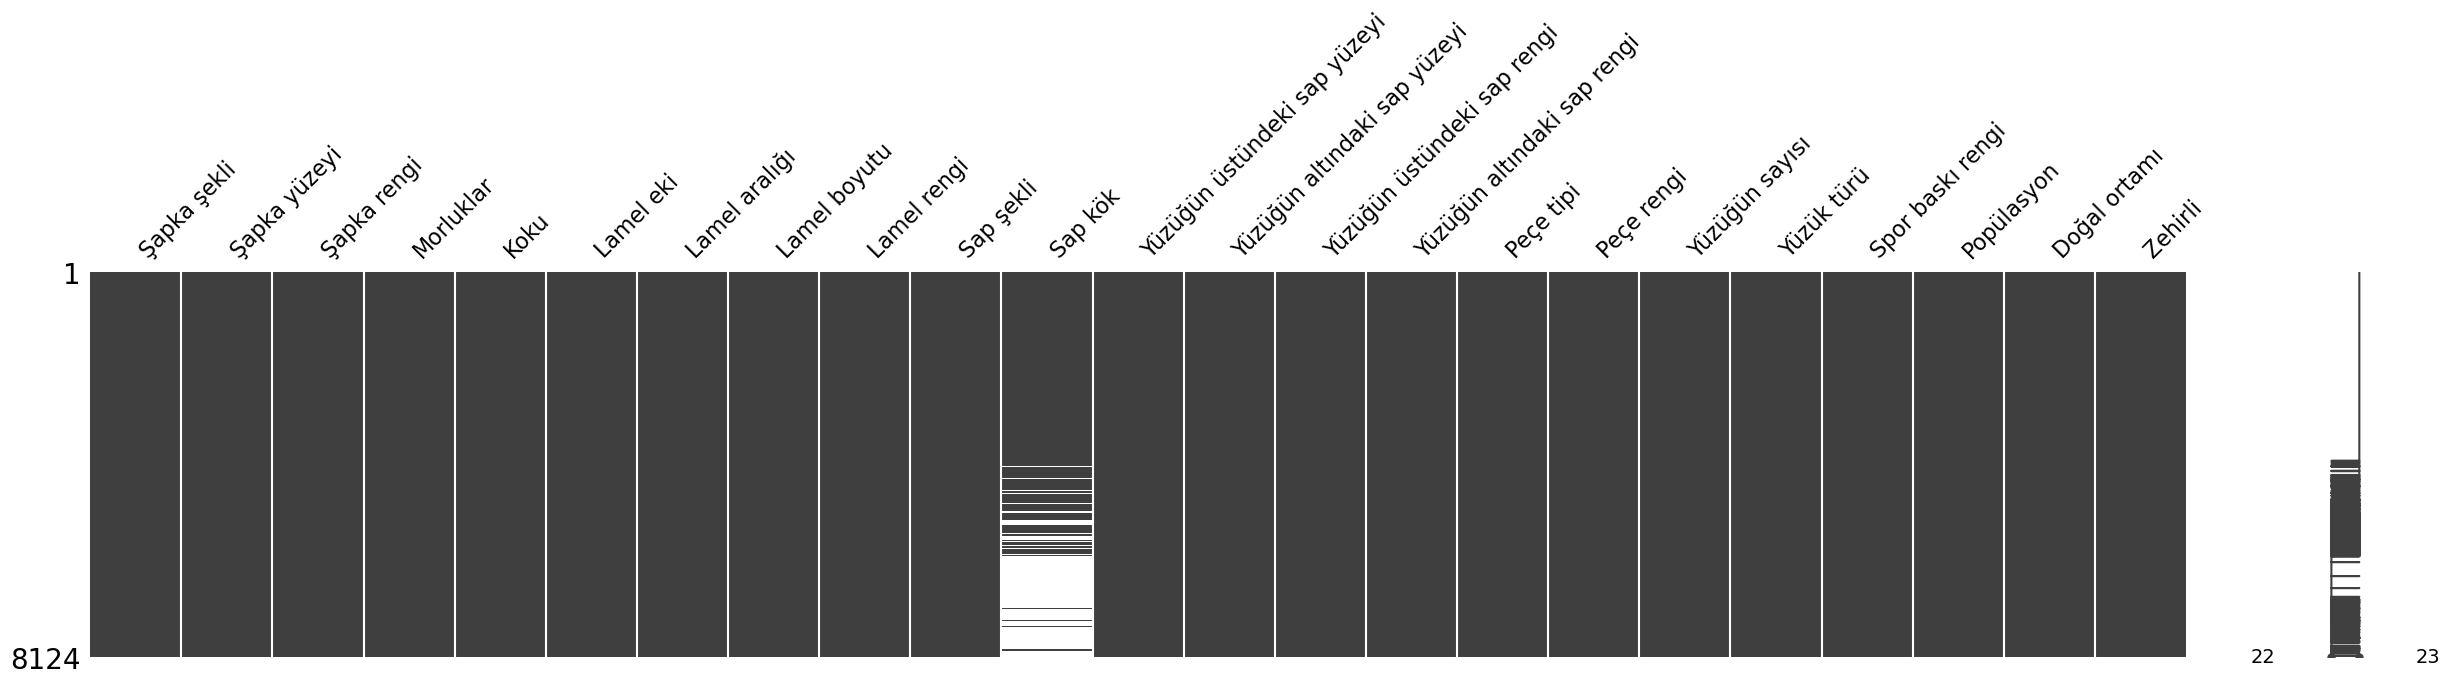

In [9]:
# How many missing values are there in our dataset?
missingno.matrix(df, figsize = (30,5))

<Axes: >

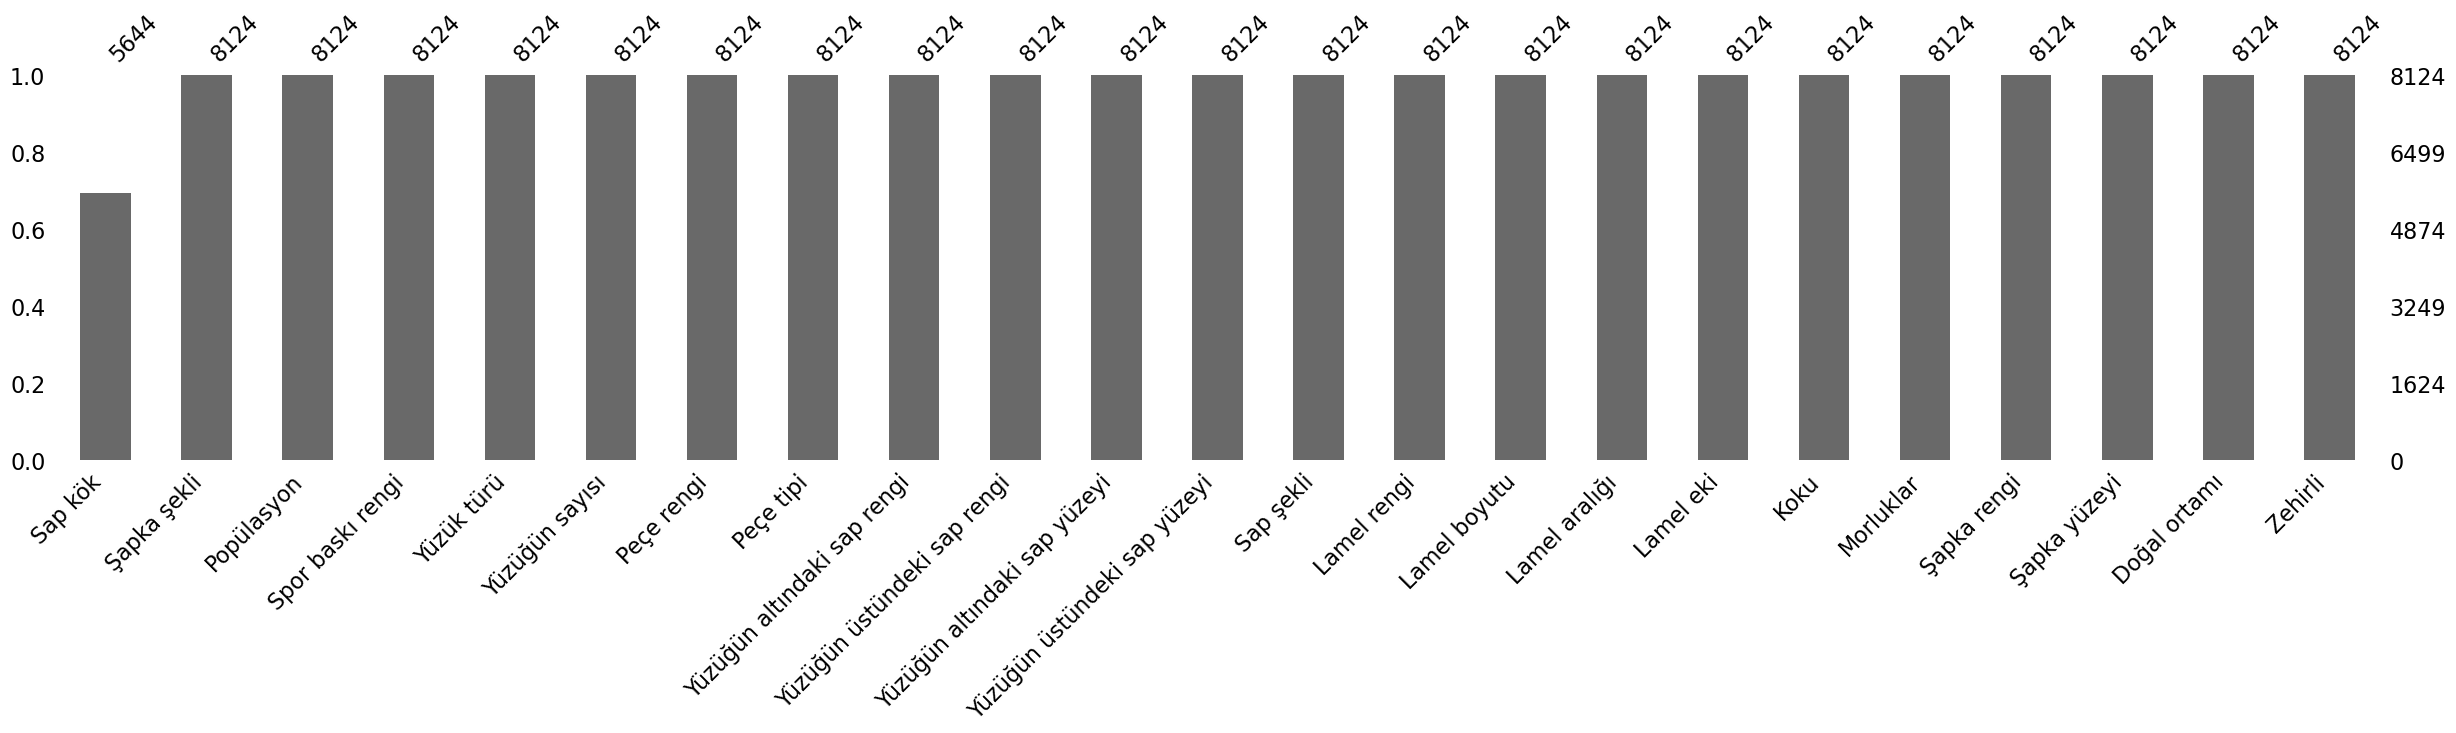

In [10]:
missingno.bar(df, sort='ascending', figsize = (30,5))

In [11]:
# Eksik değerlerin toplamını kontrol etme
missing_values = df.isnull().sum()
missing_values #Sap kökte 2480 adet veri kayıp

Şapka şekli                        0
Şapka yüzeyi                       0
Şapka rengi                        0
Morluklar                          0
Koku                               0
Lamel eki                          0
Lamel aralığı                      0
Lamel boyutu                       0
Lamel rengi                        0
Sap şekli                          0
Sap kök                         2480
Yüzüğün üstündeki sap yüzeyi       0
Yüzüğün altındaki sap yüzeyi       0
Yüzüğün üstündeki sap rengi        0
Yüzüğün altındaki sap rengi        0
Peçe tipi                          0
Peçe rengi                         0
Yüzüğün sayısı                     0
Yüzük türü                         0
Spor baskı rengi                   0
Popülasyon                         0
Doğal ortamı                       0
Zehirli                            0
dtype: int64

In [12]:
df['Sap kök'] = df['Sap kök'].fillna(df['Sap kök'].mode()[0])
# Bu kod, belirli bir sütundaki eksik değerleri en yaygın değerle doldurur. 
# fillna yöntemi, sütundaki eksik değerleri doldururken kullanılırken, mode()[0] yöntemi sütundaki 
# en yaygın değeri (modu) bulur.

<Axes: >

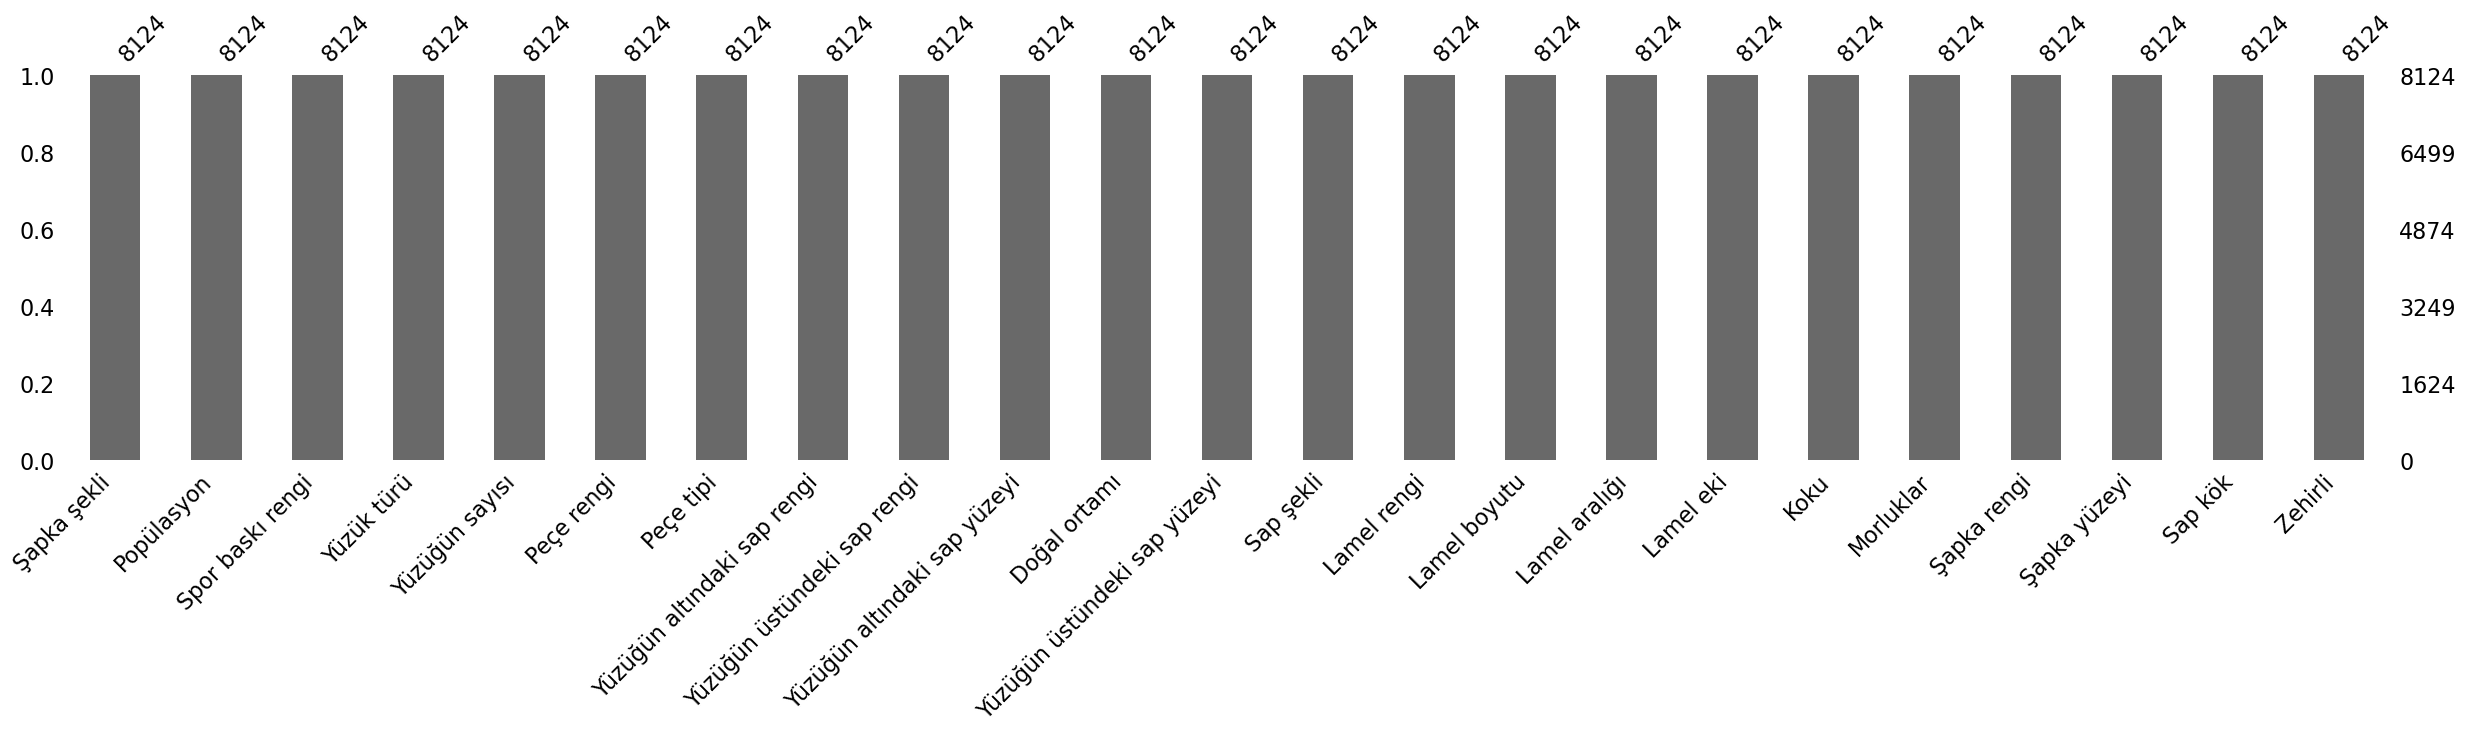

In [13]:
missingno.bar(df, sort='ascending', figsize = (30,5))

## VERİ SETİNİ NUMERİK VERİ TÜRÜNE DÖNÜŞTÜRMEK

In [14]:
df.dtypes

Şapka şekli                     object
Şapka yüzeyi                    object
Şapka rengi                     object
Morluklar                       object
Koku                            object
Lamel eki                       object
Lamel aralığı                   object
Lamel boyutu                    object
Lamel rengi                     object
Sap şekli                       object
Sap kök                         object
Yüzüğün üstündeki sap yüzeyi    object
Yüzüğün altındaki sap yüzeyi    object
Yüzüğün üstündeki sap rengi     object
Yüzüğün altındaki sap rengi     object
Peçe tipi                       object
Peçe rengi                      object
Yüzüğün sayısı                  object
Yüzük türü                      object
Spor baskı rengi                object
Popülasyon                      object
Doğal ortamı                    object
Zehirli                         object
dtype: object

In [15]:
df['Şapka şekli'].unique()
# Örnek olarak "Şapka şekli" sütunundaki değişkenlerin değer tipleri görünüyor

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [16]:
# Tüm kategorik sütunları bul
categorical_columns = df.select_dtypes(include=['object']).columns

# LabelEncoder'ı kullanarak tüm kategorik sütunları dönüştür
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])

In [17]:
df.head()

,Şapka şekli,Şapka yüzeyi,Şapka rengi,Morluklar,Koku,Lamel eki,Lamel aralığı,Lamel boyutu,Lamel rengi,Sap şekli,...,Yüzüğün üstündeki sap rengi,Yüzüğün altındaki sap rengi,Peçe tipi,Peçe rengi,Yüzüğün sayısı,Yüzük türü,Spor baskı rengi,Popülasyon,Doğal ortamı,Zehirli
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [18]:
df['Şapka şekli'].unique()
# Görüldüğü üzere label encoder ile beraber veri tiplerimiz sayısal hale dönüştü.
# Kaç adet unique değer varsa ona göre sayı atanıyor. 5 adet ayrı değişken var ve toplam 5 ayrı numerik değer oluşmuş oldu.

array([5, 0, 4, 2, 3, 1])

## ÖZELLİK İNDİRGEME

#### 1. KORELASYON MATRİSİ

In [19]:
corr = df.corr()

In [20]:
corr

,Şapka şekli,Şapka yüzeyi,Şapka rengi,Morluklar,Koku,Lamel eki,Lamel aralığı,Lamel boyutu,Lamel rengi,Sap şekli,...,Yüzüğün üstündeki sap rengi,Yüzüğün altındaki sap rengi,Peçe tipi,Peçe rengi,Yüzüğün sayısı,Yüzük türü,Spor baskı rengi,Popülasyon,Doğal ortamı,Zehirli
Şapka şekli,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
Şapka yüzeyi,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
Şapka rengi,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
Morluklar,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
Koku,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
Lamel eki,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
Lamel aralığı,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
Lamel boyutu,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
Lamel rengi,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
Sap şekli,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


<Axes: >

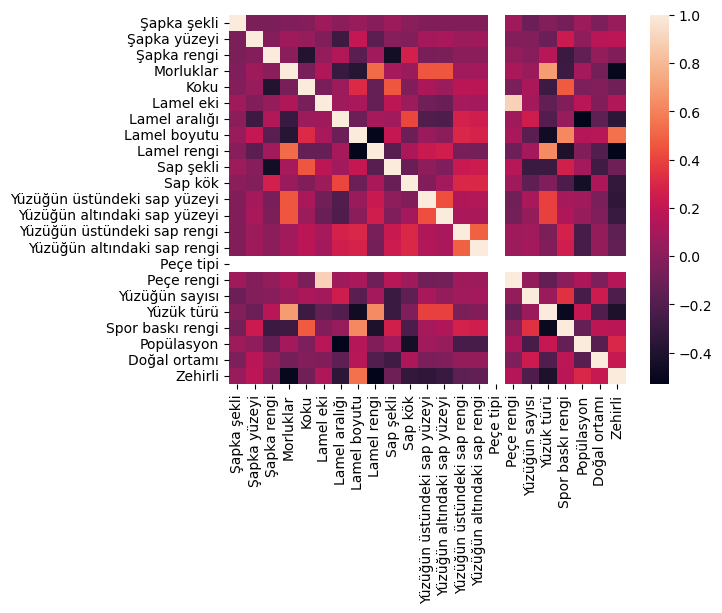

In [21]:
sns.heatmap(corr)

#### 2.  ÖZELLİK ÖNEMLERİ BELİRLEME


Hangi özniteliklerin mantarların zehirli olmasına etki etmediğini bulalım.

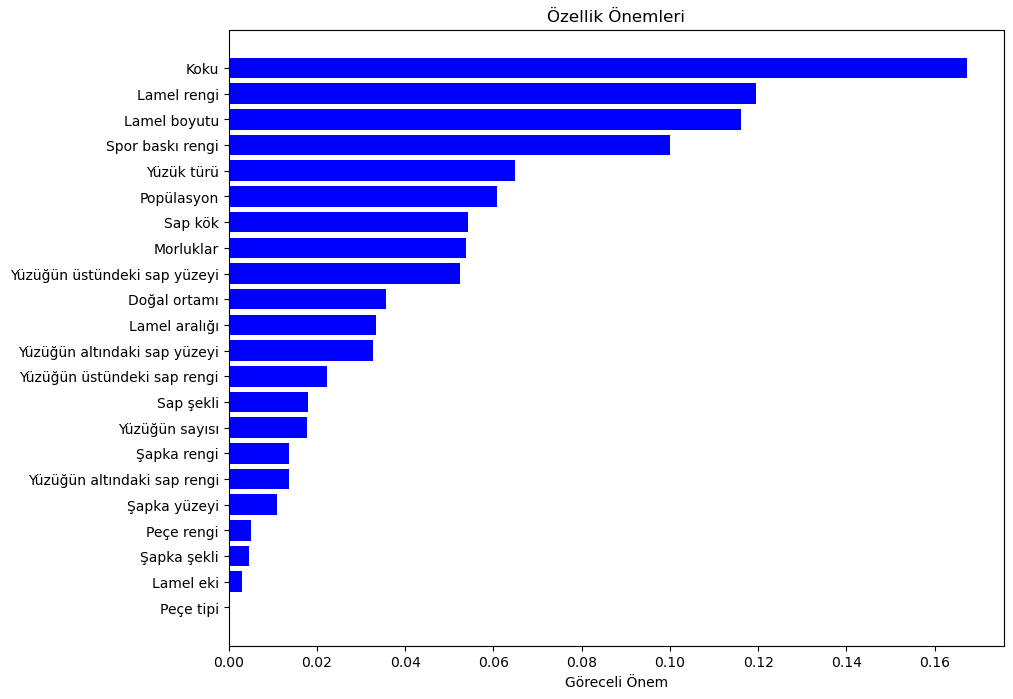

In [22]:

# Bağımsız değişkenler ve bağımlı değişken (class)
X = df.drop('Zehirli', axis=1)
y = df['Zehirli']

# Modeli oluşturun ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Özellik önemlerini alın
importances = model.feature_importances_
features = X.columns

# Özellik önemlerini görselleştirme
import matplotlib.pyplot as plt

indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Özellik Önemleri')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Göreceli Önem')
plt.show()

#### 3. PCA

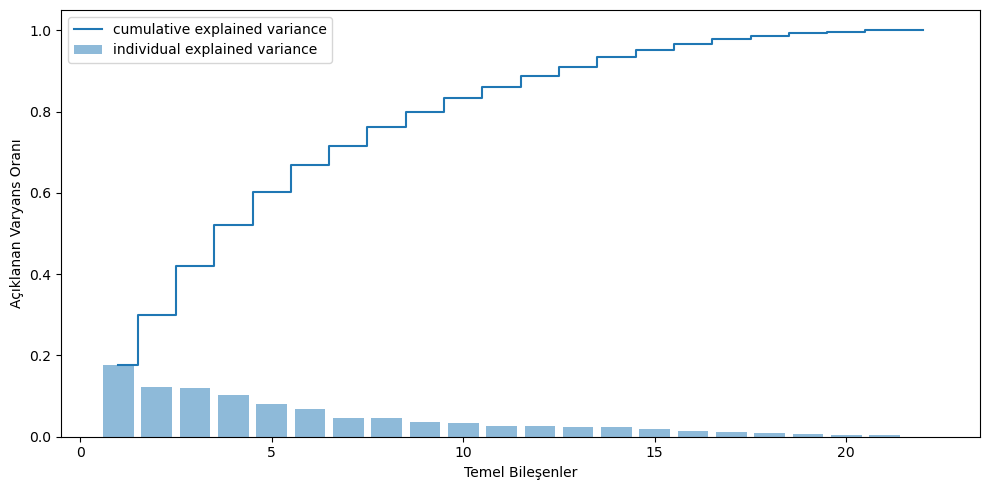

In [23]:
# Gerekli kütüphaneleri içe aktarın
# Gerekli kütüphaneleri içe aktarın
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


dataset_bin_enc = pd.DataFrame(df)

# 'Zehirli' sütununu hedef değişken olarak ayırma ve diğer özellikleri ölçeklendirme
std_scale = StandardScaler().fit(dataset_bin_enc.drop('Zehirli', axis=1))
X = std_scale.transform(dataset_bin_enc.drop('Zehirli', axis=1))

# PCA uygulama
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X)

# PCA bileşenlerinin varyans oranlarını grafikle gösterme
plt.figure(figsize=(10, 5))
plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, X.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), where='mid', label='cumulative explained variance')
plt.ylabel('Açıklanan Varyans Oranı')
plt.xlabel('Temel Bileşenler')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


C:\Users\merve\AppData\Local\Temp\ipykernel_19348\3459360602.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


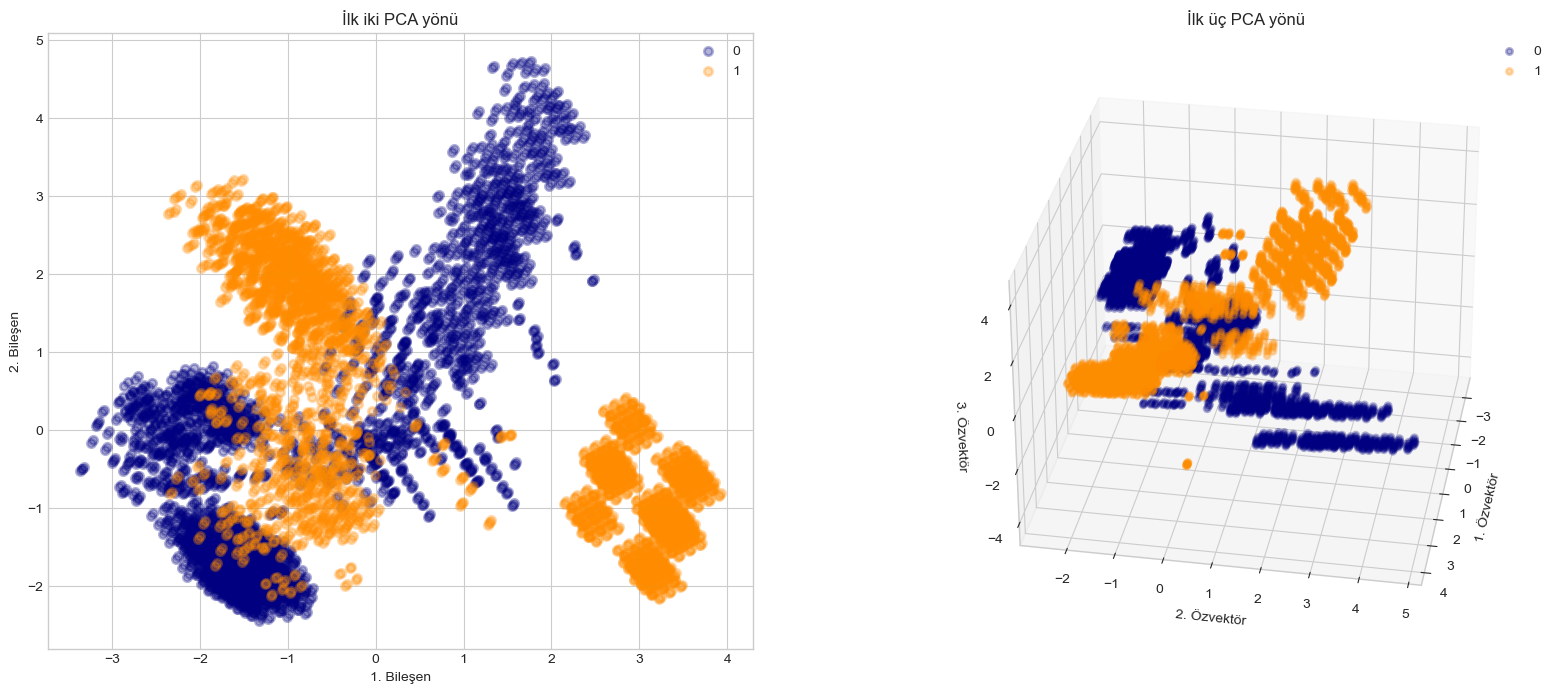

In [24]:
# Gerekli kütüphaneleri içe aktarın
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Örnek veri seti
# df'in numerik olduğunu ve 'Zehirli' sütunu içerdiğini varsayıyoruz
# dataset_bin_enc = pd.DataFrame(df)

# 'Zehirli' sütununu hedef değişken olarak ayırın ve diğer özellikleri ölçeklendirin
std_scale = StandardScaler().fit(df.drop('Zehirli', axis=1))
X = std_scale.transform(df.drop('Zehirli', axis=1))
y = df['Zehirli']

# Grafikleri formatlamak için ayarlar
target_names = [0, 1]  # Zehirli değerlerinizin 0 ve 1 olduğunu varsayıyorum
colors = ['navy', 'darkorange']
lw = 2
alpha = 0.3

# 2 bileşenli PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('İlk iki PCA yönü')
plt.xlabel('1. Bileşen')
plt.ylabel('2. Bileşen')

# 3 bileşenli PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("İlk üç PCA yönü")
ax.set_xlabel("1. Özvektör")
ax.set_ylabel("2. Özvektör")
ax.set_zlabel("3. Özvektör")

# Eksenleri döndürme
ax.view_init(30, 10)

plt.show()


####  ÖZNİTELİKLERİ BELİRLEME

Özelliklerin zehirlilik sınıfı ile olan ilişkisini belirlemek için RandomForestClassifier kullanarak özellik önemini hesaplayabilirsiniz.

In [25]:
# Özellik önemlerini ve isimlerini birleştirin
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})

# Önem sırasına göre sıralayın
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Belirli bir eşik değerinin altındaki önemlere sahip özellikleri seçin
threshold = 0.01
less_important_features = feature_importance_df[feature_importance_df['importance'] < threshold]

print("Zehirlilik sınıfına etki etmeyen özellikler:")
print(less_important_features)


Zehirlilik sınıfına etki etmeyen özellikler:
        feature  importance
16   Peçe rengi    0.004982
0   Şapka şekli    0.004539
5     Lamel eki    0.003047
15    Peçe tipi    0.000000


Özellik önemlerinden, düşük önem değerlerine sahip olanları zehirlilik sınıfına etki etmeyen özellikler olarak kabul edebiliriz.

In [26]:
# Sütunları çıkarın
df = df.drop(["Peçe rengi","Şapka rengi","Lamel eki","Peçe tipi"],axis=1)

In [27]:
df.shape

(8124, 19)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Şapka şekli                   8124 non-null   int32
 1   Şapka yüzeyi                  8124 non-null   int32
 2   Morluklar                     8124 non-null   int32
 3   Koku                          8124 non-null   int32
 4   Lamel aralığı                 8124 non-null   int32
 5   Lamel boyutu                  8124 non-null   int32
 6   Lamel rengi                   8124 non-null   int32
 7   Sap şekli                     8124 non-null   int32
 8   Sap kök                       8124 non-null   int32
 9   Yüzüğün üstündeki sap yüzeyi  8124 non-null   int32
 10  Yüzüğün altındaki sap yüzeyi  8124 non-null   int32
 11  Yüzüğün üstündeki sap rengi   8124 non-null   int32
 12  Yüzüğün altındaki sap rengi   8124 non-null   int32
 13  Yüzüğün sayısı                812

#### ÖZNİTELİKLER

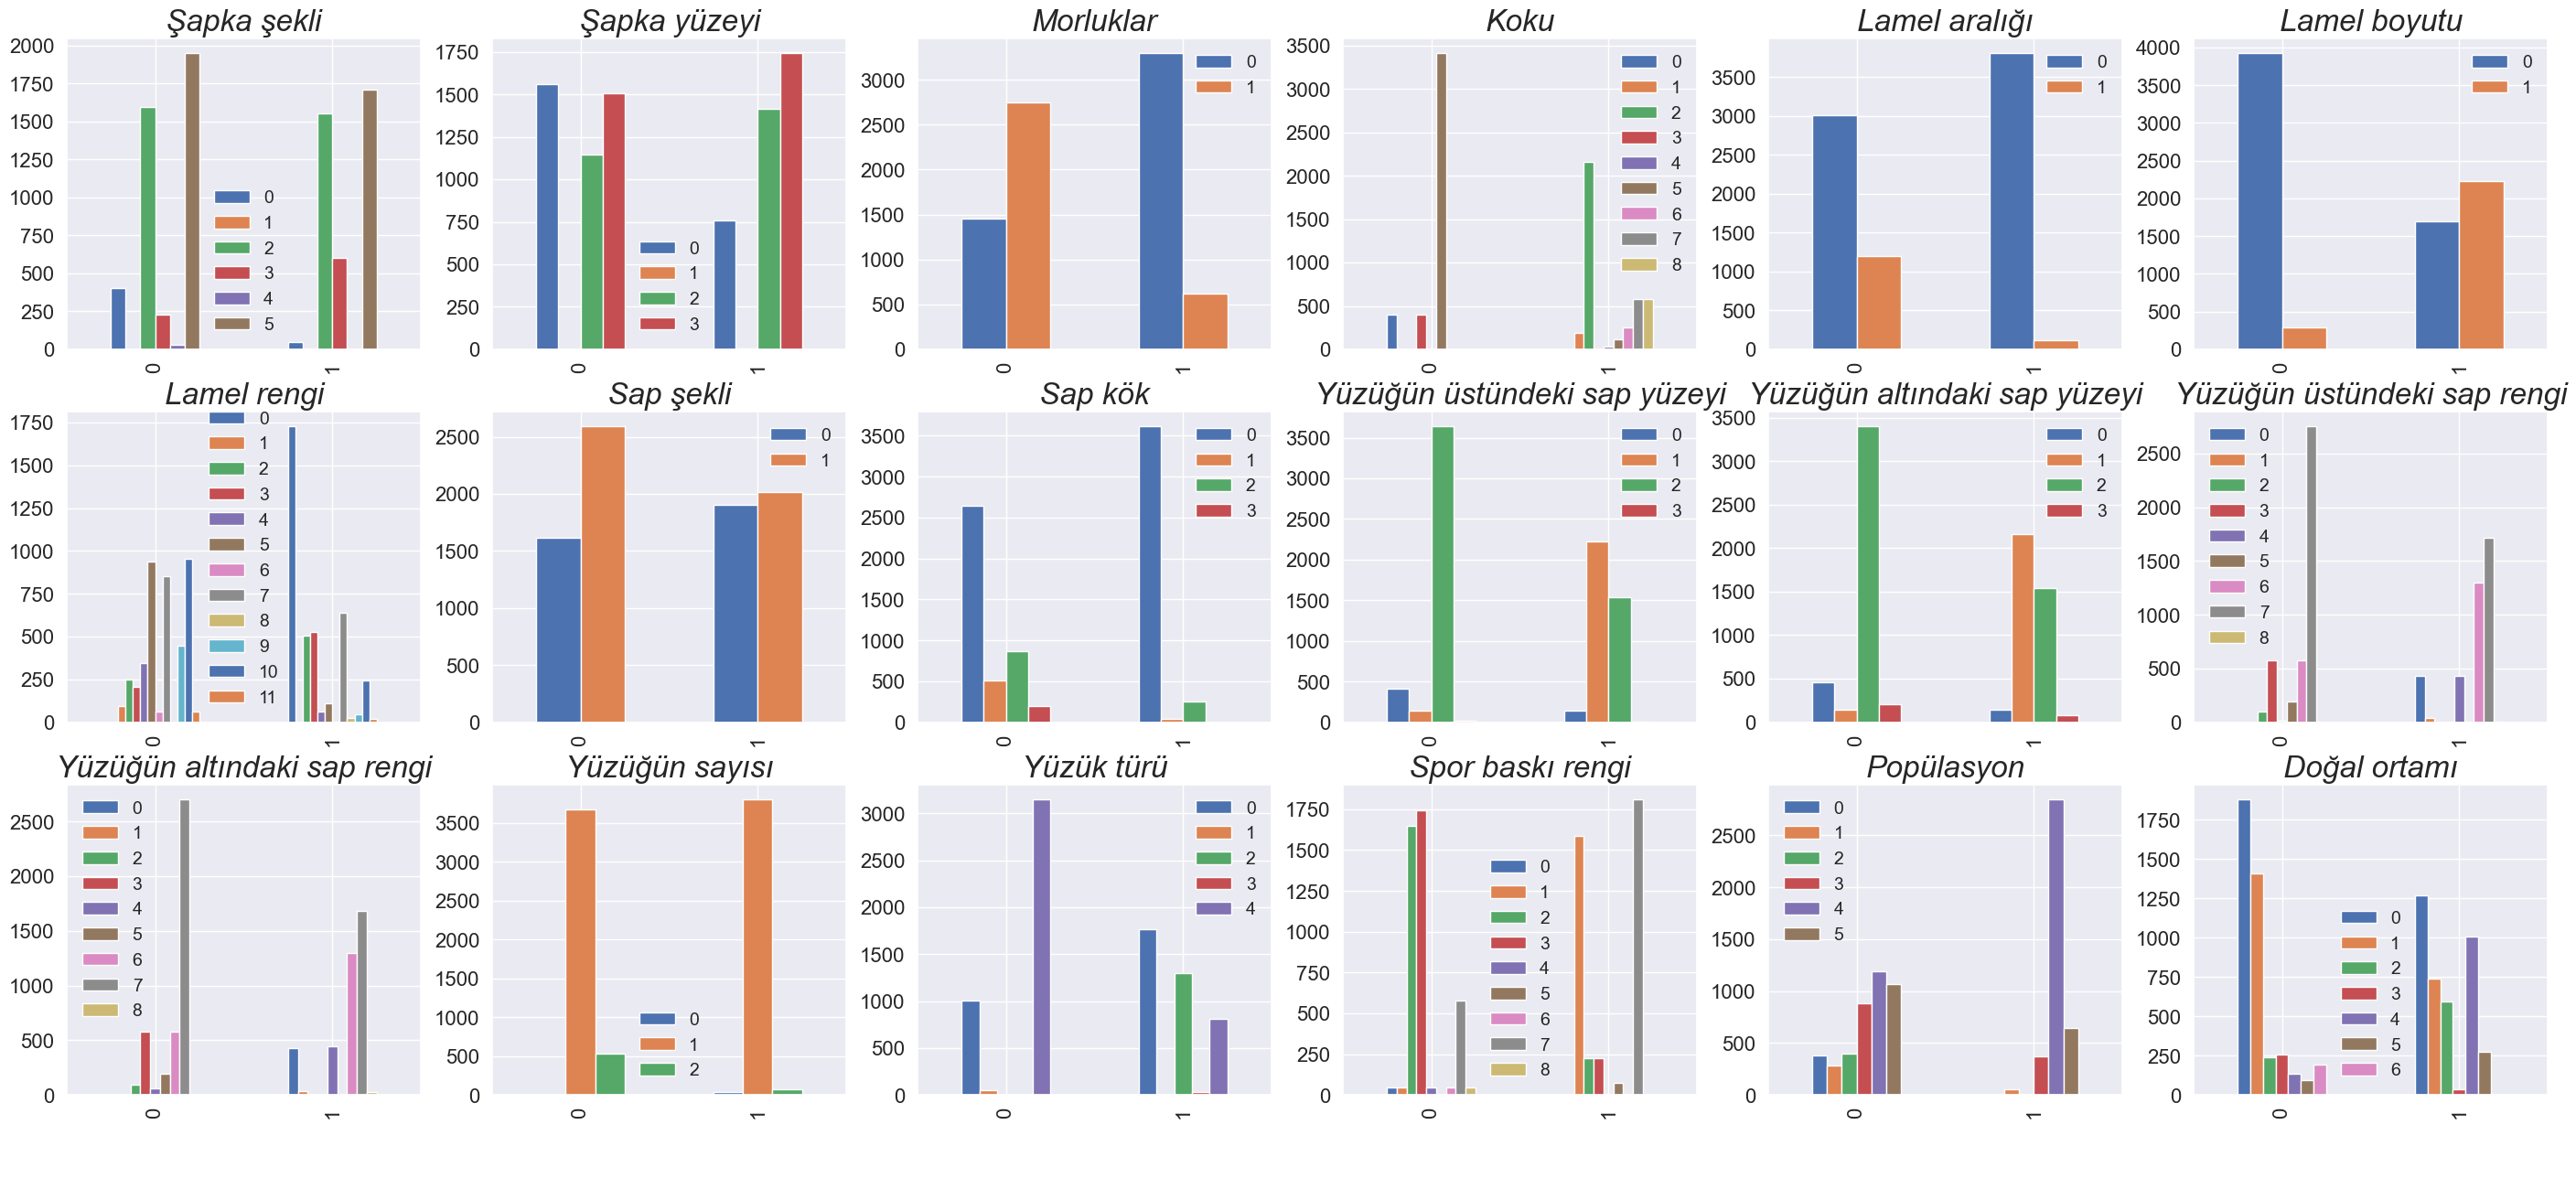

In [29]:
feature_columns = df.columns[:]
sns.set(style="darkgrid",color_codes=True)
fig,axes = plt.subplots(nrows=3,ncols=6,figsize=(35,15))
df['id'] = np.arange(df.shape[0])

for f, ax in zip(feature_columns,axes.ravel()):
    df.groupby(['Zehirli',f])['id'].count().unstack(f).plot(kind='bar',ax=ax,legend=True,grid=True,fontsize = 16)
    ax.set_title(f,style="oblique",size=24)
    ax.set_xlabel(" \n",style="italic",size=18)
    ax.legend(fontsize=14)
df = df.drop('id',axis=1)

## Çaprazlık tablosu / Olumsallık tablosu / Kontenjans tablosu

Bir bağımlılık tablosu, gözlemlerin her biri birkaç değişkenden her biri için bir kategoriye ait olduğu bir veri setini tanımlayan çok yönlü bir tablodur.

Zehirli ve Doğal Ortamı için sonuçlara bakalım.

In [30]:
table = sm.stats.Table.from_data(df[["Zehirli", "Doğal ortamı"]])

Bağımsızlık, satır ve sütun faktörlerinin bağımsız olarak meydana geldiği özelliktir. İlişki, bağımsızlığın eksikliğidir. Ortak dağılım bağımsız ise, satır ve sütun marjinal dağılımların dış çarpımı olarak yazılabilir:

P_{ij} = sum_k P_{ik} \cdot sum_k P_{kj} için tüm i, j

Gözlemlenen verilerimiz için en iyi uyumlu bağımsız dağılımı elde edebilir ve ardından bağımsızlığı en çok ihlal eden belirli hücreleri tanımlayan artıklara bakabiliriz.

In [31]:
print("Table Original")
table.table_orig

Table Original


Doğal ortamı,0,1,2,3,4,5,6
Zehirli,,,,,,,
0,1880,1408,240,256,136,96,192
1,1268,740,592,36,1008,272,0


Eğer bir tablonun satırları ve sütunları sırasız ise (yani nominal faktörler ise), bağımsızlığın resmi olarak değerlendirilmesi için en yaygın yaklaşım Pearson'ın χ^2 istatistiğini kullanmaktır. Bağımlılık için kanıtların nereden geldiğini görmek için genellikle χ^2 istatistiğine hücre bazında katkılarına bakmak faydalı olabilir.

In [32]:
rslt = table.test_ordinal_association()
print(rslt.pvalue)
print(rslt.null_mean)
print(rslt.null_sd)
print(rslt.statistic)
print(rslt.zscore)

2.087226116707285e-85
5909.578866391778
77.47982068564889
7427.0
19.584726967357117


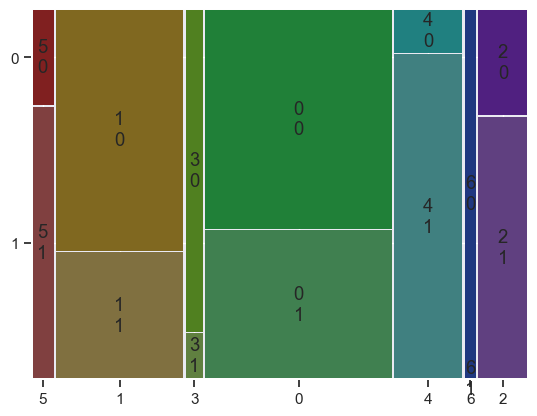

In [33]:
plt.rcParams['font.size'] = 16.0
mosaic(df, ['Doğal ortamı', 'Zehirli']);


Yukarıda gösterildiği gibi kategorik değişkenleri değerlendirmek için bir fonksiyon oluşturalım.

In [34]:
def Asses_variable(var1, var2):
    # Contigency Table
    table = sm.stats.Table.from_data(df[[var1, var2]])
    print("\n\nTable Original")
    print(table.table_orig)
    
    # p-value
    rslt = table.test_ordinal_association()
    print("P-value is: ", rslt.pvalue)
    
    # Mosaic plot for visualization
    plt.rcParams['font.size'] = 16.0
    mosaic(df, [var2, var1])
    return rslt.pvalue

In [35]:
pvalues_list = []



Table Original
Sap kök     0    1    2    3
Zehirli                     
0        2640  512  864  192
1        3616   44  256    0
P-value is:  2.4894321022917304e-187


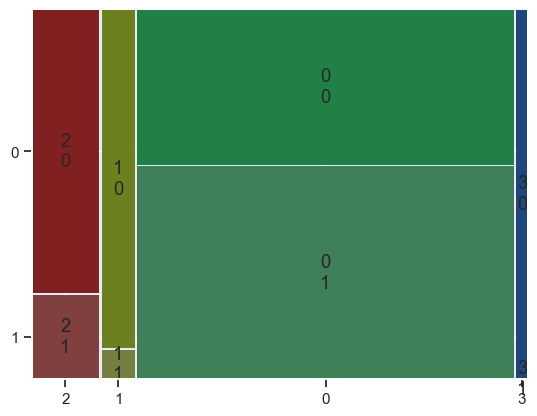

In [36]:
pval = Asses_variable('Zehirli', 'Sap kök')
pvalues_list.append(pval)



Table Original
Koku       0    1     2    3   4     5    6    7    8
Zehirli                                              
0        400    0     0  400   0  3408    0    0    0
1          0  192  2160    0  36   120  256  576  576
P-value is:  2.898205229054972e-17


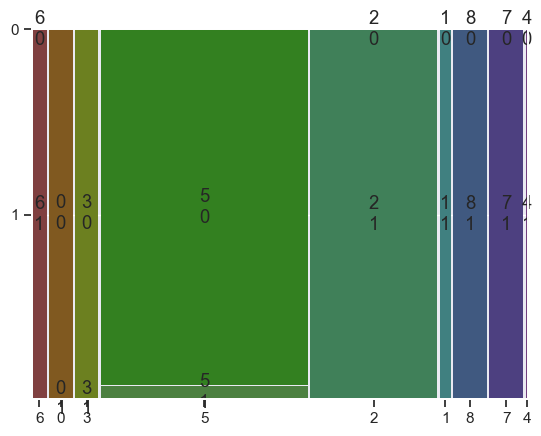

In [37]:
pval = Asses_variable('Zehirli', 'Koku')
pvalues_list.append(pval)



Table Original
Lamel rengi    0   1    2    3    4    5   6    7   8    9    10  11
Zehirli                                                             
0               0  96  248  204  344  936  64  852   0  444  956  64
1            1728   0  504  528   64  112   0  640  24   48  246  22
P-value is:  0.0


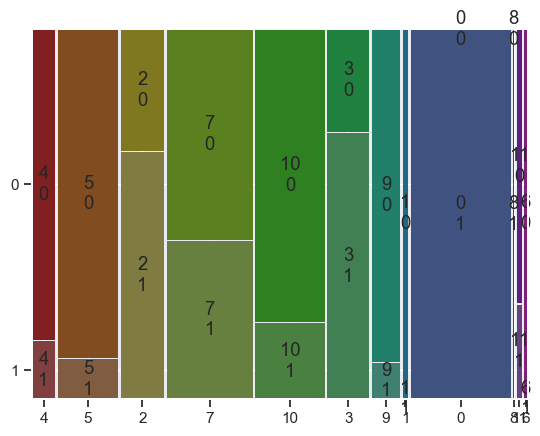

In [38]:
pval = Asses_variable('Zehirli', 'Lamel rengi')
pvalues_list.append(pval)



Table Original
Morluklar     0     1
Zehirli              
0          1456  2752
1          3292   624
P-value is:  0.0


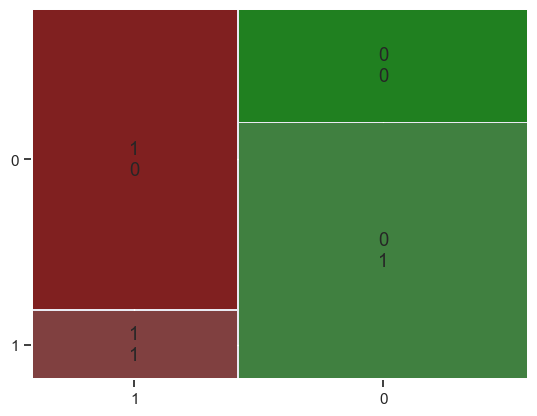

In [39]:
pval = Asses_variable('Zehirli', 'Morluklar')
pvalues_list.append(pval)



Table Original
Yüzüğün üstündeki sap rengi    0   1   2    3    4    5     6     7  8
Zehirli                                                               
0                              0   0  96  576   16  192   576  2752  0
1                            432  36   0    0  432    0  1296  1712  8
P-value is:  9.813275846866959e-44


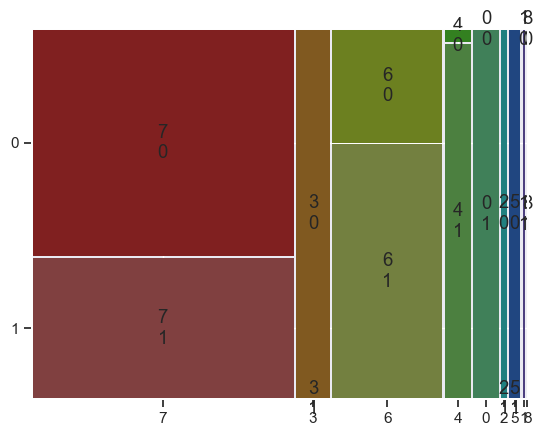

In [40]:
pval = Asses_variable('Zehirli', 'Yüzüğün üstündeki sap rengi')
pvalues_list.append(pval)



Table Original
Popülasyon    0    1    2    3     4     5
Zehirli                                   
0           384  288  400  880  1192  1064
1             0   52    0  368  2848   648
P-value is:  3.117160349628868e-159


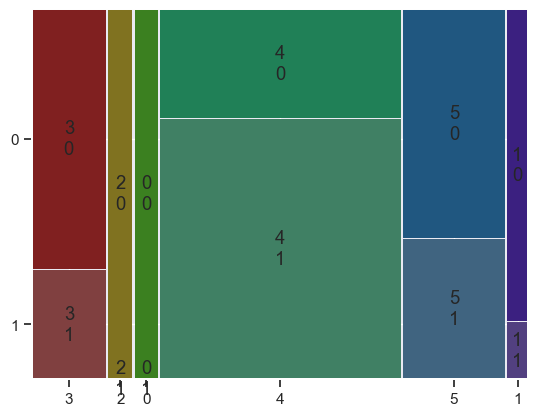

In [41]:
pval = Asses_variable('Zehirli', 'Popülasyon')
pvalues_list.append(pval)



Table Original
Şapka şekli    0  1     2    3   4     5
Zehirli                                 
0            404  0  1596  228  32  1948
1             48  4  1556  600   0  1708
P-value is:  1.734382789790259e-06


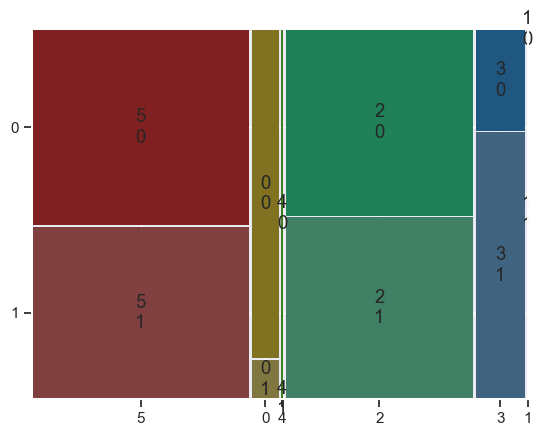

In [42]:
pval = Asses_variable('Zehirli', 'Şapka şekli')
pvalues_list.append(pval)



Table Original
Yüzük türü     0   1     2   3     4
Zehirli                             
0           1008  48     0   0  3152
1           1768   0  1296  36   816
P-value is:  1.5143200600214458e-301


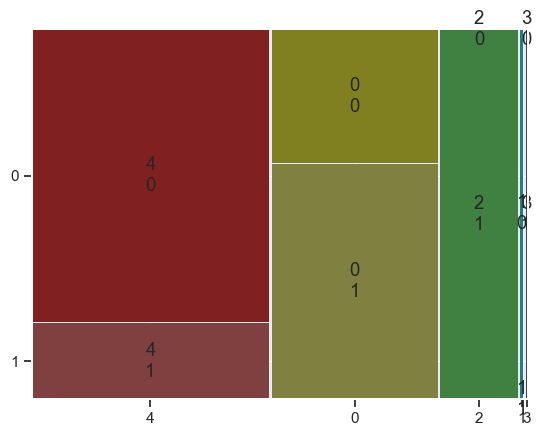

In [43]:
pval = Asses_variable('Zehirli', 'Yüzük türü')
pvalues_list.append(pval)



Table Original
Sap şekli     0     1
Zehirli              
0          1616  2592
1          1900  2016
P-value is:  3.759093524938306e-20


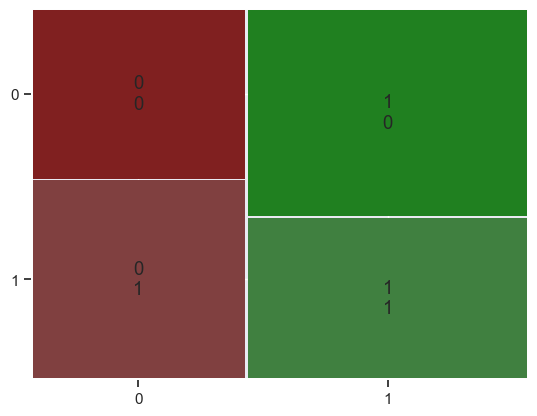

In [44]:
pval = Asses_variable('Zehirli', 'Sap şekli')
pvalues_list.append(pval)



Table Original
Lamel aralığı     0     1
Zehirli                  
0              3008  1200
1              3804   112
P-value is:  2.068703418689218e-216


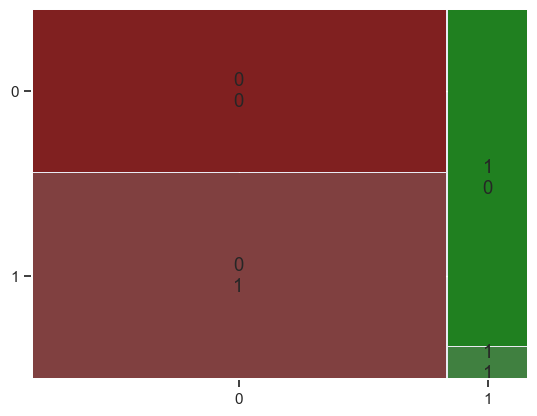

In [45]:
pval = Asses_variable('Zehirli', 'Lamel aralığı')
pvalues_list.append(pval)



Table Original
Şapka şekli    0  1     2    3   4     5
Zehirli                                 
0            404  0  1596  228  32  1948
1             48  4  1556  600   0  1708
P-value is:  1.734382789790259e-06


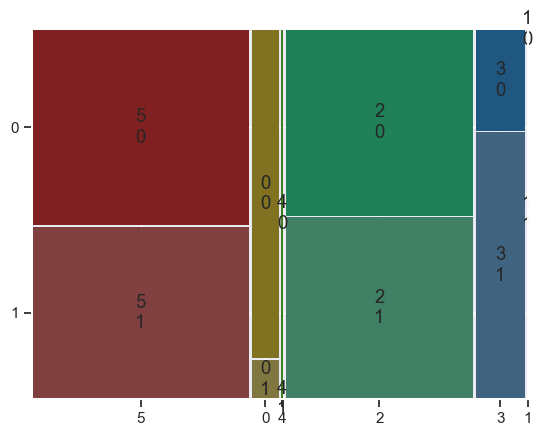

In [46]:
pval = Asses_variable('Zehirli', 'Şapka şekli')
pvalues_list.append(pval)



Table Original
Spor baskı rengi   0     1     2     3   4   5   6     7   8
Zehirli                                                     
0                 48    48  1648  1744  48   0  48   576  48
1                  0  1584   224   224   0  72   0  1812   0
P-value is:  3.440862321301373e-54


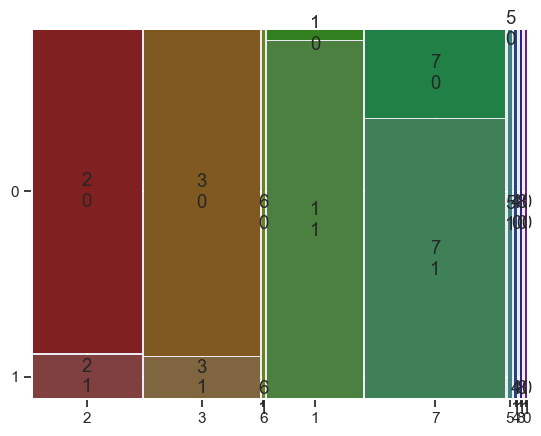

In [47]:
pval = Asses_variable('Zehirli', 'Spor baskı rengi')
pvalues_list.append(pval)

In [48]:
pvalues_list

[2.4894321022917304e-187,
 2.898205229054972e-17,
 0.0,
 0.0,
 9.813275846866959e-44,
 3.117160349628868e-159,
 1.734382789790259e-06,
 1.5143200600214458e-301,
 3.759093524938306e-20,
 2.068703418689218e-216,
 1.734382789790259e-06,
 3.440862321301373e-54]

pvalue_list tüm çok düşük değerlere sahip olduğundan dolayı tüm özellikler "Class" değişkeni ile güçlü bir ilişkiye sahiptir.

## Makine Öğrenimi Algoritmaları

- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Decision Tree
- Linear SVC


###### 1. Lojistik Regresyon

In [49]:
# Bağımsız değişkenler ve bağımlı değişken (class)
x = df.drop('Zehirli', axis=1)
y = df['Zehirli']


In [50]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.77,random_state=6)

log=LogisticRegression()
model=log.fit(x_train,y_train)
acc_log = log.score(x_test,y_test)

#from sklearn.metrics import classification_report
print(metrics.classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3228
           1       0.95      0.93      0.94      3027

    accuracy                           0.94      6255
   macro avg       0.94      0.94      0.94      6255
weighted avg       0.94      0.94      0.94      6255



C:\Users\merve\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
#from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       980
           1       0.95      0.92      0.94       889

    accuracy                           0.94      1869
   macro avg       0.94      0.94      0.94      1869
weighted avg       0.94      0.94      0.94      1869



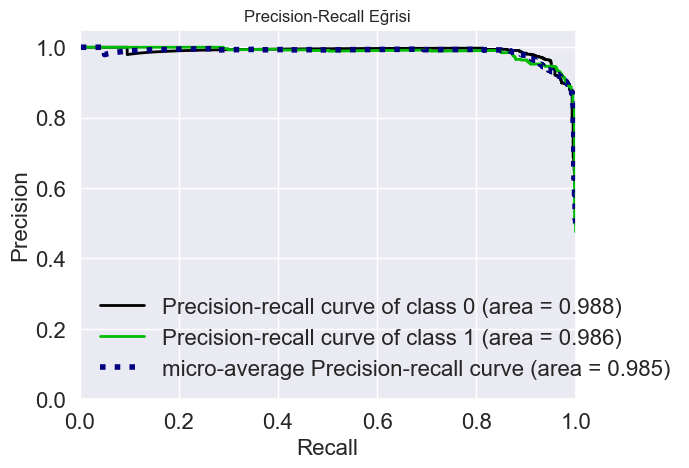

In [52]:
y_probas = log.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title("Precision-Recall Eğrisi")
plt.show()

Karışıklık Matrisi:
 [[939  41]
 [ 67 822]]


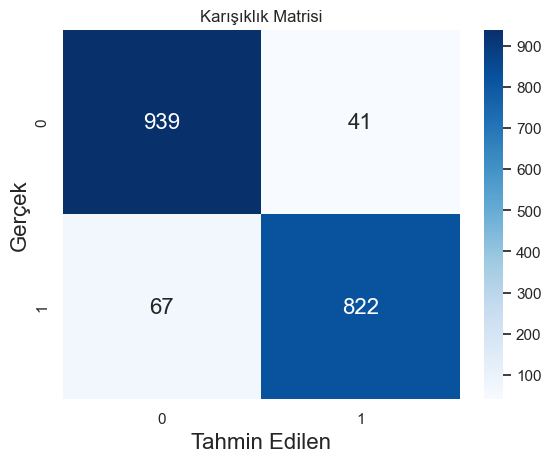

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       980
           1       0.95      0.92      0.94       889

    accuracy                           0.94      1869
   macro avg       0.94      0.94      0.94      1869
weighted avg       0.94      0.94      0.94      1869



In [53]:
# Test seti üzerinde tahminler
y_pred = model.predict(x_test)

# Karışıklık matrisi oluşturma
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", cm)

# Karışıklık matrisini görselleştirme
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

###### 2. En Yakın Komşu(KNN)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=6)

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)

model=knn.fit(x_train,y_train)

In [56]:
knn.score(x_test,y_test)
acc_knn = knn.score(x_test,y_test)

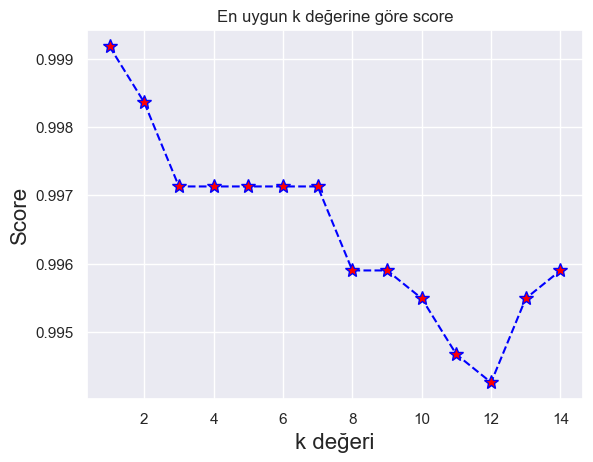

In [57]:
score_list = []
for each in range(1,15):
    knn1 = KNeighborsClassifier(n_neighbors=each)
    knn1.fit(x_train,y_train)
    score_list.append(knn1.score(x_test,y_test))
    
plt.title("En uygun k değerine göre score")
plt.plot(range(1,15),score_list, color = 'blue', linestyle = 'dashed', marker = '*', markerfacecolor = 'red', markersize = 10)
plt.xlabel("k değeri")
plt.ylabel("Score")
plt.show()

In [58]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
knn.predict(x_test)

array([0, 1, 0, ..., 0, 1, 1])

In [59]:
knn.score(x_test,y_test)

0.9942575881870386

In [60]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00      1162

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [61]:
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2932
           1       1.00      1.00      1.00      2754

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686



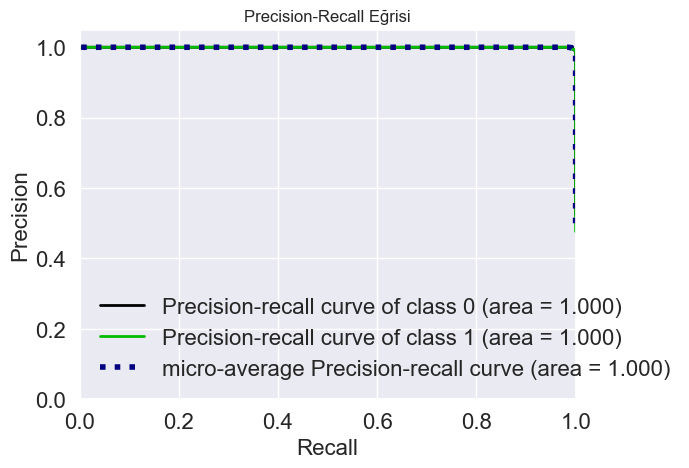

In [62]:
y_probas = knn.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title("Precision-Recall Eğrisi")
plt.show()

Karışıklık Matrisi:
 [[1271    5]
 [   2 1160]]


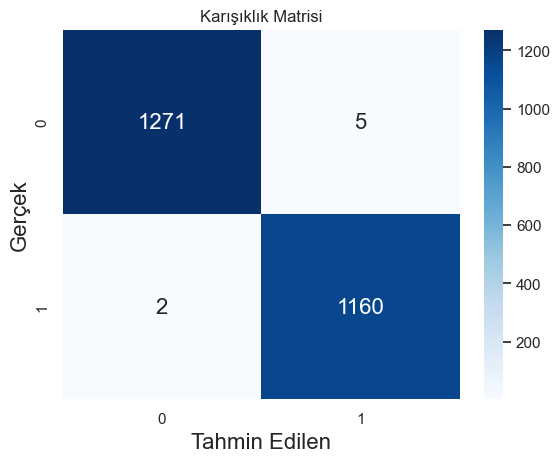

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00      1162

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [63]:
# Test seti üzerinde tahminler
y_pred = model.predict(x_test)

# Karışıklık matrisi oluşturma
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", cm)

# Karışıklık matrisini görselleştirme
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

###### 3. NAIVE BAYES

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=6)

In [65]:
clf = GaussianNB()
clf.fit(x_train,y_train)
model = clf.fit(x_train,y_train)

In [66]:
clf.score(x_test,y_test)
acc_gasussian=clf.score(x_test,y_test)

In [67]:
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1276
           1       0.94      0.81      0.87      1162

    accuracy                           0.89      2438
   macro avg       0.89      0.88      0.89      2438
weighted avg       0.89      0.89      0.89      2438



In [68]:
y_pred = clf.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2932
           1       0.94      0.83      0.88      2754

    accuracy                           0.89      5686
   macro avg       0.90      0.89      0.89      5686
weighted avg       0.90      0.89      0.89      5686



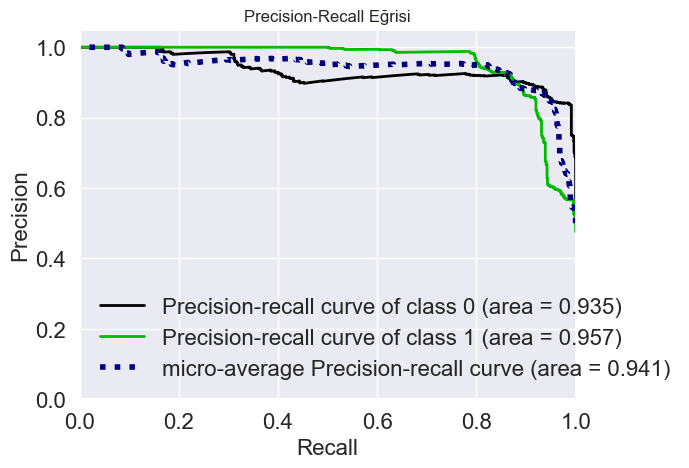

In [69]:
y_probas = clf.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title("Precision-Recall Eğrisi")
plt.show()

Karışıklık Matrisi:
 [[1217   59]
 [ 217  945]]


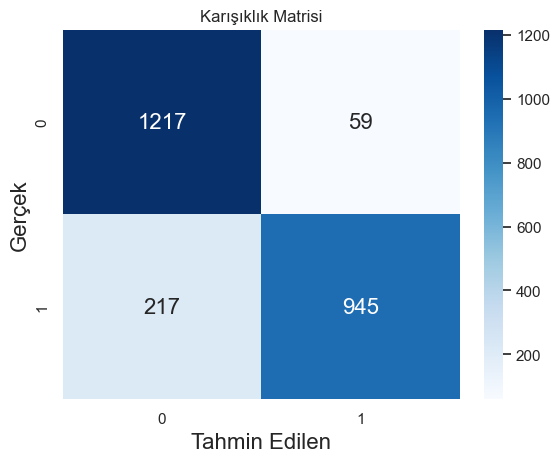

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1276
           1       0.94      0.81      0.87      1162

    accuracy                           0.89      2438
   macro avg       0.89      0.88      0.89      2438
weighted avg       0.89      0.89      0.89      2438



In [70]:
# Test seti üzerinde tahminler
y_pred = model.predict(x_test)

# Karışıklık matrisi oluşturma
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", cm)

# Karışıklık matrisini görselleştirme
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

###### 4. Decision Tree Classifier

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.40,random_state=6)

In [72]:
tree=DecisionTreeClassifier()
model = tree.fit(x_train,y_train)

In [73]:
tree.score(x_test,y_test)
acc_dt=tree.score(x_test,y_test)

In [74]:
model.predict([np.array(x.iloc[8121])]) #Başarılı şekilde tahmin etti

C:\Users\merve\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

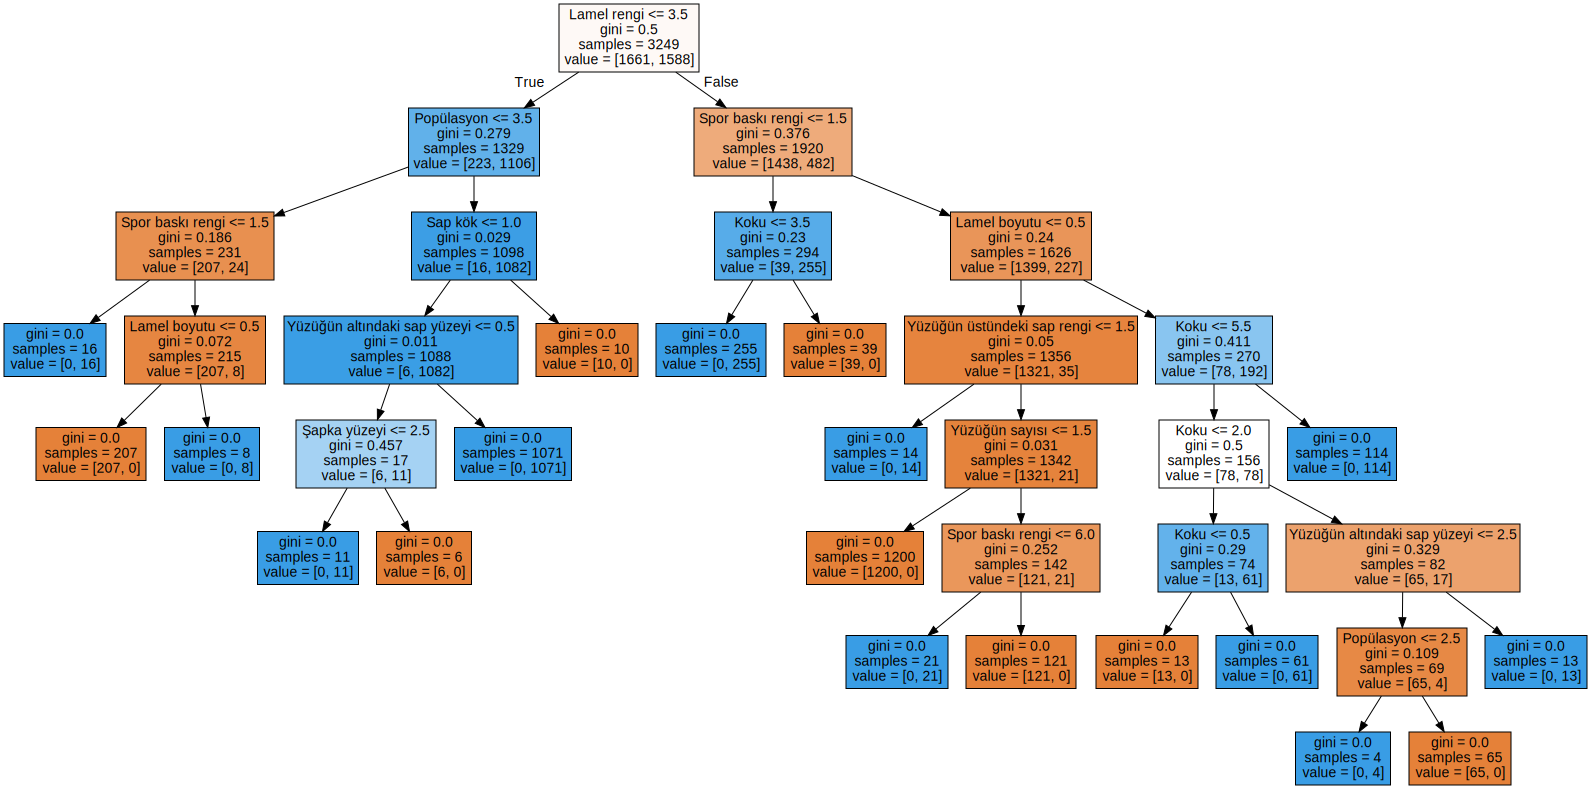

In [75]:
from sklearn.tree import export_graphviz
dot=export_graphviz(model,feature_names=x.columns,filled=True)
gorsel=graphviz.Source(dot)
gorsel

In [76]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(
    model,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot)

# Görsel boyutunu ayarlamak içinn
graph.format = 'png'  # Formatı PNG olarak ayarlama
graph.engine = 'dot'  # Grafın çizim motorunu ayarlama
graph.render("decision_tree", format='png', engine='dot', quiet=False, view=True, cleanup=True)  # Boyutları ayarlayın

'decision_tree.png'

In [77]:
accuracy_score(y_test,model.predict(x_test))

1.0

In [78]:
confusion_matrix(y_test,model.predict(x_test))

array([[2547,    0],
       [   0, 2328]], dtype=int64)

In [79]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2547
           1       1.00      1.00      1.00      2328

    accuracy                           1.00      4875
   macro avg       1.00      1.00      1.00      4875
weighted avg       1.00      1.00      1.00      4875



In [80]:
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1661
           1       1.00      1.00      1.00      1588

    accuracy                           1.00      3249
   macro avg       1.00      1.00      1.00      3249
weighted avg       1.00      1.00      1.00      3249



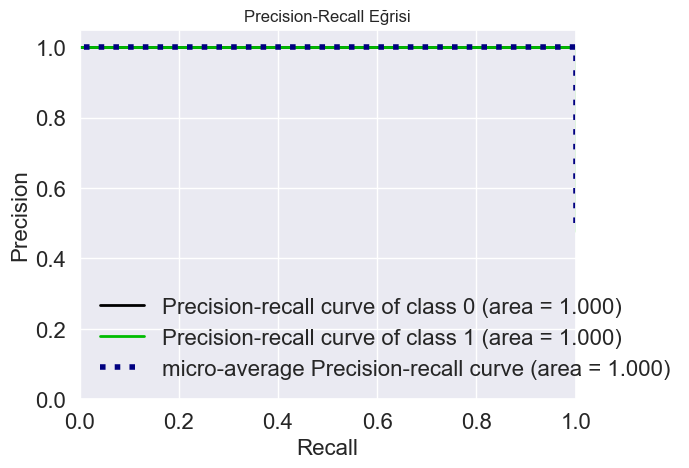

In [81]:
y_probas = tree.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title("Precision-Recall Eğrisi")
plt.show()

Karışıklık Matrisi:
 [[2547    0]
 [   0 2328]]


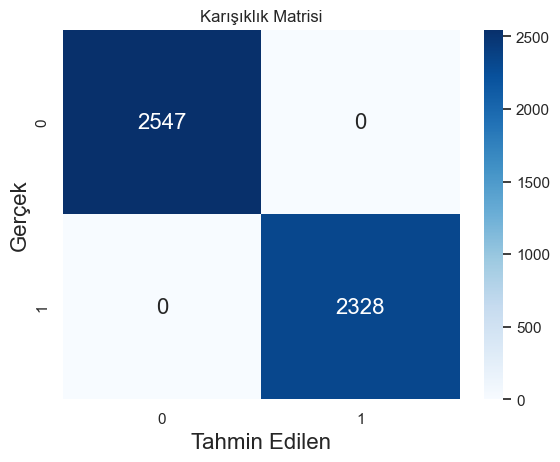

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2547
           1       1.00      1.00      1.00      2328

    accuracy                           1.00      4875
   macro avg       1.00      1.00      1.00      4875
weighted avg       1.00      1.00      1.00      4875



In [82]:
# Test seti üzerinde tahminler
y_pred = model.predict(x_test)

# Karışıklık matrisi oluşturma
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", cm)

# Karışıklık matrisini görselleştirme
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

###### 5. Random Forest

In [83]:
# Modeli oluşturun ve eğitin
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x, y)

RandomForestClassifier(random_state=42)

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=16,train_size=0.05)

In [85]:
tree=RandomForestClassifier()
model=tree.fit(x_train,y_train)
model.score(x_test,y_test)
acc_rf = model.score(x_test,y_test)

In [86]:
def predict_mushroom(poisonous_array):
    # Modeli kullanarak tahmin yapalım
    prediction = model.predict([poisonous_array])
    if prediction[0] == 0:
        return "Zehirsiz"
    else:
        return "Zehirli"
    
# 0 Zehirsiz, 1 Zehirli

In [87]:
result = predict_mushroom(np.array(x.iloc[0]))
print("Tahmin sonucu:", result)  # Çıktı: Tahmin sonucu: Zehirli

Tahmin sonucu: Zehirli


C:\Users\merve\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [88]:
accuracy_score(y_test,model.predict(x_test))

0.9989634620367971

In [89]:
confusion_matrix(y_test,model.predict(x_test))

array([[4015,    0],
       [   8, 3695]], dtype=int64)

In [90]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4015
           1       1.00      1.00      1.00      3703

    accuracy                           1.00      7718
   macro avg       1.00      1.00      1.00      7718
weighted avg       1.00      1.00      1.00      7718



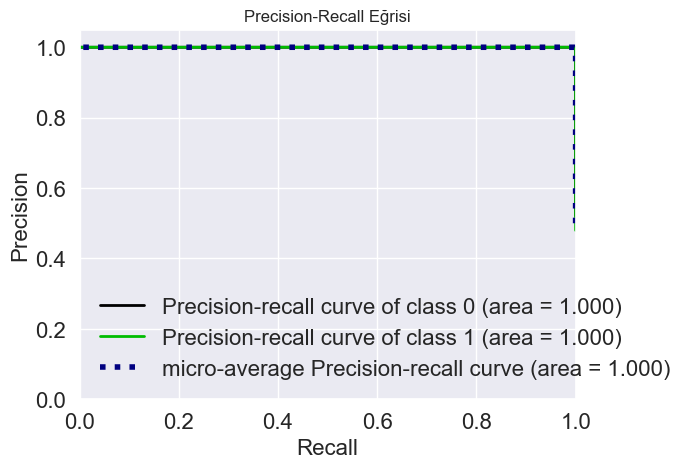

In [91]:
y_probas = tree.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title("Precision-Recall Eğrisi")
plt.show()

Karışıklık Matrisi:
 [[4015    0]
 [   8 3695]]


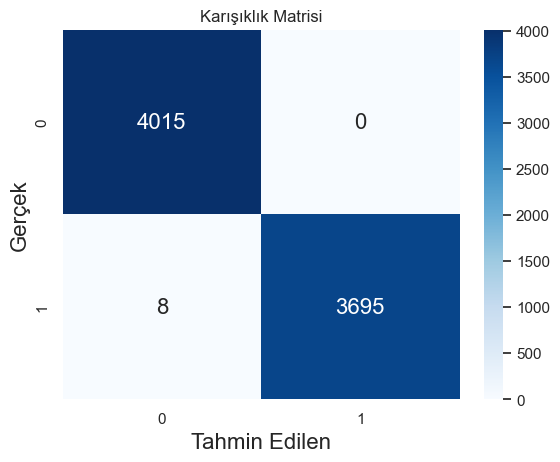

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4015
           1       1.00      1.00      1.00      3703

    accuracy                           1.00      7718
   macro avg       1.00      1.00      1.00      7718
weighted avg       1.00      1.00      1.00      7718



In [92]:
# Test seti üzerinde tahminler
y_pred = model.predict(x_test)

# Karışıklık matrisi oluşturma
cm = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", cm)

# Karışıklık matrisini görselleştirme
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Sınıflandırma raporu
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

In [93]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [
        acc_knn, 
        acc_log,
        acc_rf,
        acc_gasussian,
        acc_dt
        
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,1.000000
2,Random Forest,0.998963
0,KNN,0.997129
1,Logistic Regression,0.942215
3,Naive Bayes,0.886792
